In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import torch
from torch import optim
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from hessian_eigenthings import compute_hessian_eigenthings, compute_hessian_eigenthings_gan
from rs_gan import networks
from rs_gan import datasets
import pickle
import hessian_eigenthings.density as density_lib

# Toy Example

In [4]:
num_samples = 100
num_features = 16
torch.manual_seed(0)
X = torch.normal(0, 1, size=(num_samples, num_features))
y = torch.normal(0, 1, size = (num_samples,1))

In [5]:
class Network(nn.Module):

    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(16, 1)
        
    def forward(self,x):

        x = self.fc1(x)
        
        return x

In [6]:
linear_model = Network()
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = optim.SGD(linear_model.parameters(), lr=0.001, momentum=0.9)
trainloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X, y), batch_size=50,shuffle=True)

In [7]:
num_eigenthings = 15  # compute top 20 eigenvalues/eigenvectors

eigenvals, eigenvecs = compute_hessian_eigenthings(linear_model, trainloader,
                                                   criterion, num_eigenthings, use_gpu=False,
                                                  mode="power_iter")

15
0
1[=============================================>...................]  Step: 2ms | Tot: 32ms | power iter error: 0.00 15/20 
 [=============================================================>...]  Step: 2ms | Tot: 45ms | power iter error: 0.00 20/20 
2
 [=============================================================>...]  Step: 2ms | Tot: 37ms | power iter error: 0.00 20/20 
3
4[=========>.......................................................]  Step: 1ms | Tot: 5ms | power iter error: 0.00 4/20 
5[======>..........................................................]  Step: 2ms | Tot: 4ms | power iter error: 0.00 3/20 
6[======================>..........................................]  Step: 2ms | Tot: 13ms | power iter error: 0.00 8/20 
7[===================>.............................................]  Step: 2ms | Tot: 11ms | power iter error: 0.00 7/20 
 [=============================================================>...]  Step: 2ms | Tot: 38ms | power iter error: 0.00 20/20 ======

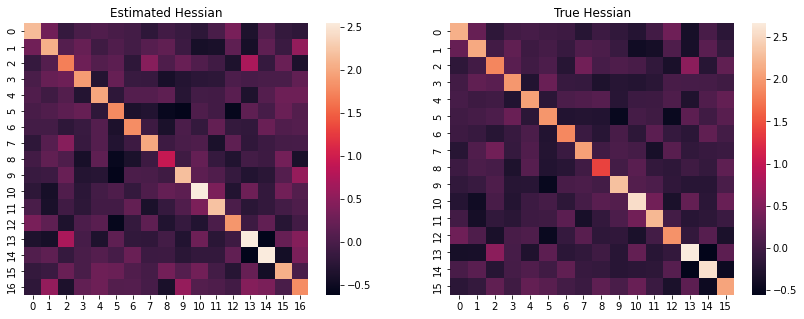

In [8]:
h = np.matmul(np.matmul(eigenvecs.T, np.diag(eigenvals)), eigenvecs)
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
H = h
plt.title("Estimated Hessian")
sns.heatmap(H)
plt.subplot(1,2,2)
plt.title("True Hessian")
sns.heatmap(2 * torch.matmul(X.T, X) / len(X))
plt.show()

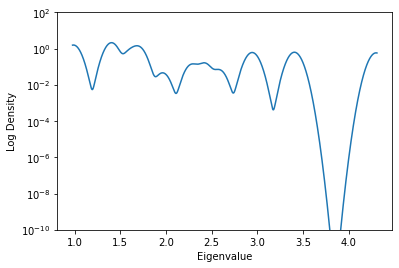

In [9]:
def plot(grids, density, label=None):
    plt.semilogy(grids, density, label=label)
    plt.ylim(1e-10, 1e2)
    plt.ylabel("Log Density")
    plt.xlabel("Eigenvalue")
    plt.show()

density, grids = density_lib.tridiag_to_density(
    eigenvals, eigenvecs, grid_len=10000, sigma_squared=1e-3)

plot(grids, density)

In [11]:
np.linalg.norm(eigenvecs)

3.8729835

# GAN

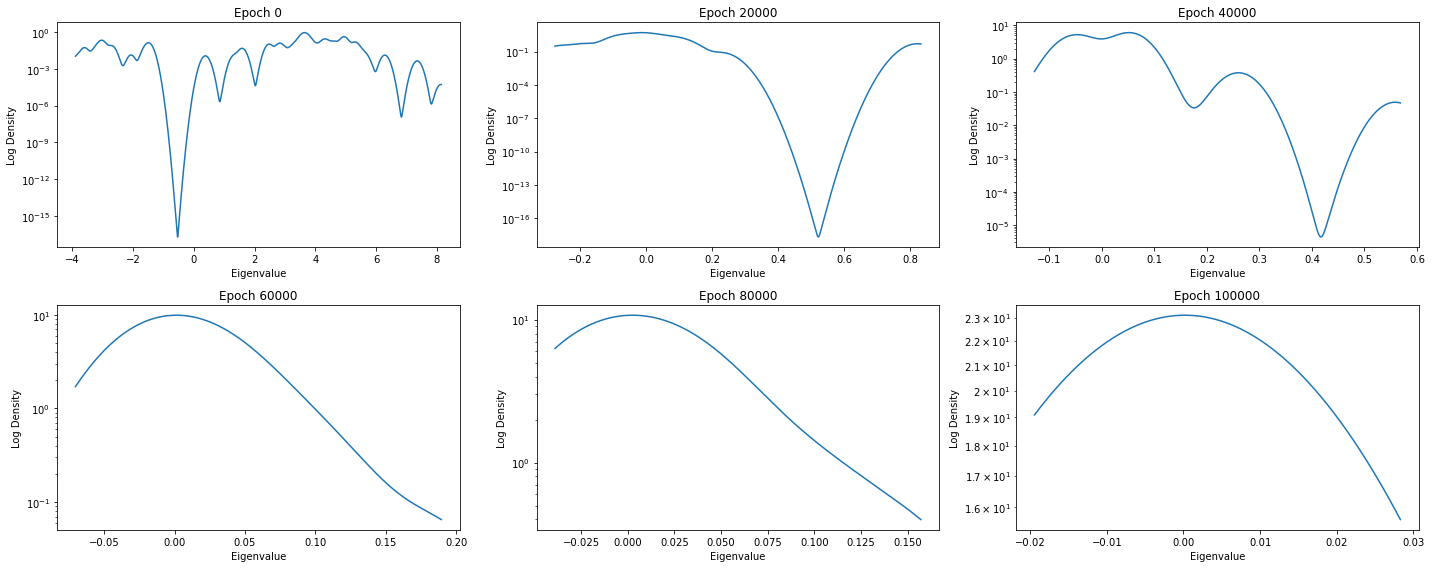

In [16]:
norm = True
model = 'gen'
epochs = [0,20000,40000,60000,80000,100000]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,8))

for i, epoch in enumerate(epochs):
    file = pickle.load(open(f'results/model_{model}_norm_{norm}_epoch_{epoch}.pkl', 'rb'))
    ax[i//3][i%3].semilogy(file['grids'], file['density'])
    ax[i//3][i%3].set_ylabel("Log Density")
    ax[i//3][i%3].set_xlabel("Eigenvalue")
    ax[i//3][i%3].set_title(f'Epoch {epoch}')
fig.tight_layout()

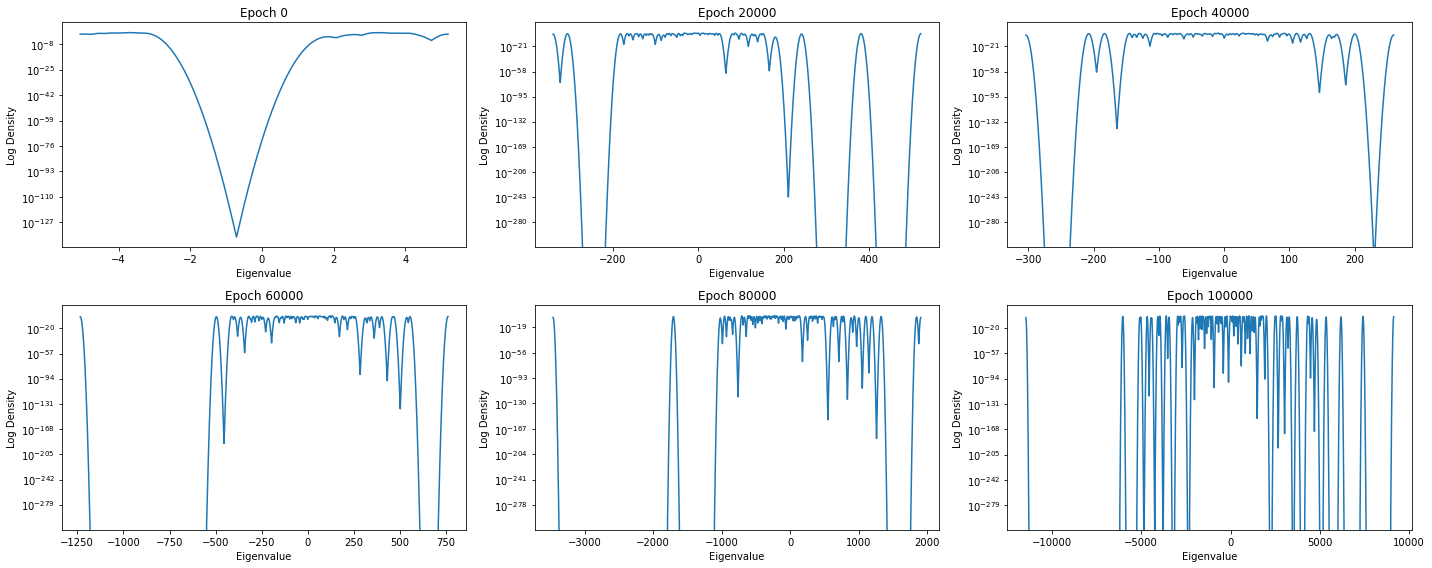

In [17]:
norm = False
model = 'gen'
epochs = [0,20000,40000,60000,80000,100000]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,8))

for i, epoch in enumerate(epochs):
    file = pickle.load(open(f'results/model_{model}_norm_{norm}_epoch_{epoch}.pkl', 'rb'))
    ax[i//3][i%3].semilogy(file['grids'], file['density'])
    ax[i//3][i%3].set_ylabel("Log Density")
    ax[i//3][i%3].set_xlabel("Eigenvalue")
    ax[i//3][i%3].set_title(f'Epoch {epoch}')
fig.tight_layout()

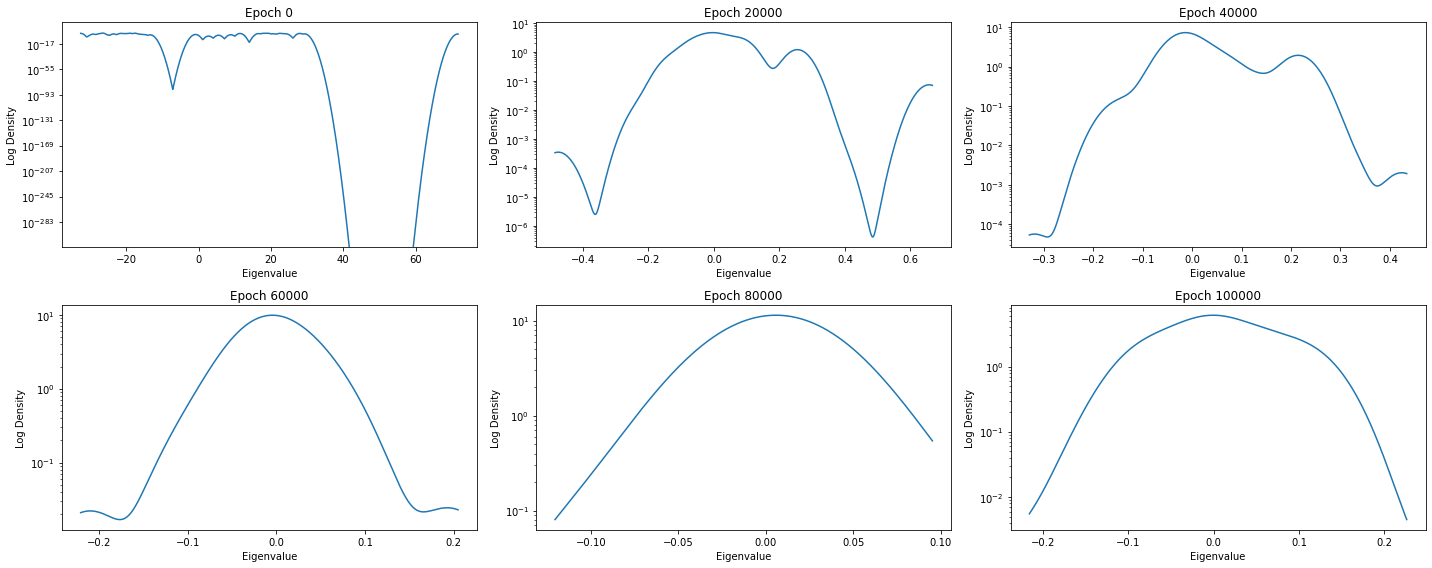

In [18]:
norm = True
model = 'dis'
epochs = [0,20000,40000,60000,80000,100000]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,8))

for i, epoch in enumerate(epochs):
    file = pickle.load(open(f'results/model_{model}_norm_{norm}_epoch_{epoch}.pkl', 'rb'))
    ax[i//3][i%3].semilogy(file['grids'], file['density'])
    ax[i//3][i%3].set_ylabel("Log Density")
    ax[i//3][i%3].set_xlabel("Eigenvalue")
    ax[i//3][i%3].set_title(f'Epoch {epoch}')
fig.tight_layout()

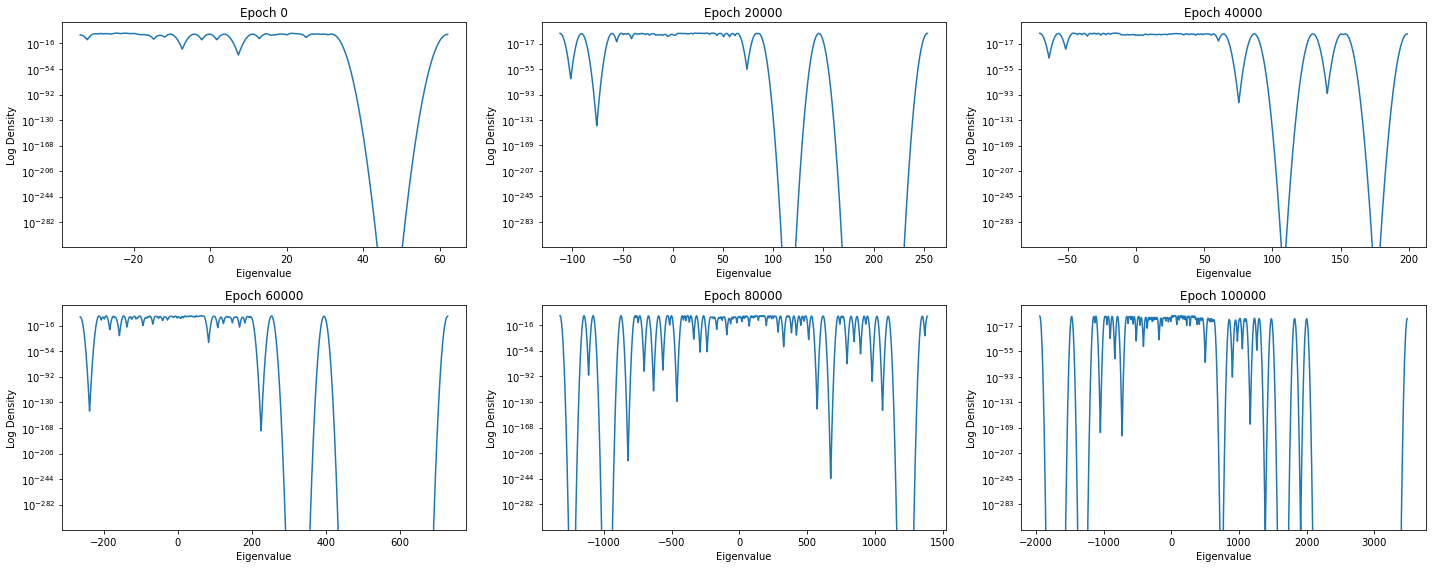

In [19]:
norm = False
model = 'dis'
epochs = [0,20000,40000,60000,80000,100000]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,8))

for i, epoch in enumerate(epochs):
    file = pickle.load(open(f'results/model_{model}_norm_{norm}_epoch_{epoch}.pkl', 'rb'))
    ax[i//3][i%3].semilogy(file['grids'], file['density'])
    ax[i//3][i%3].set_ylabel("Log Density")
    ax[i//3][i%3].set_xlabel("Eigenvalue")
    ax[i//3][i%3].set_title(f'Epoch {epoch}')
fig.tight_layout()